In [112]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import csv 

<h1>Subtasks for Data Set 3 (Auto MPG Data Set):</h1>

<body>
    <h2>Step One</h2>
    
    - First we must acquire, preprocess, and analyze the data
</body>

In [113]:
# Reading dataset into a dataframe
DataFrame = pd.read_csv('./Auto MPG Data Set/auto-mpg.data', index_col = False, header=None, names=['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model-year', 'origin', 'car-name'], delim_whitespace=True)

# As we can see from the .names file, only horsepower has missing values - there are 6 such rows without it.
# I've decided to remove these since horsepower is not categorical, and the instructions say: "You should
# remove any examples with missing or malformed features and note this in your report".

# Get names of indexes for which column horsepower has value '?'
indexNames = DataFrame[ (DataFrame['horsepower'] == '?') ].index
# Delete these row indexes from dataFrame
DataFrame.drop(indexNames , inplace=True)
# Change type of column to float now that missing values are gone
DataFrame =DataFrame.astype({'horsepower': float})


# However, now we see that car name is kind of a useless value as they all are different models.
# We will just drop it
DataFrame.drop(['car-name'] , inplace=True)

# Now we display the first few rows, looks good!
DataFrame.head(10)


ValueError: could not convert string to float: '?'

In [99]:
# However, we have 4 continuous features, which must be coverted to discrete to use naive bayes
# I will do this by assigning quartiles with a value of 1, 2, 3, or 4
bin_labels = [1.0, 2.0, 3.0, 4.0]
DataFrame['displacement'] = pd.qcut(DataFrame['displacement'],q=4,labels=False)
DataFrame['horsepower'] = pd.qcut(DataFrame['horsepower'],q=4,labels=False)
DataFrame['weight'] = pd.qcut(DataFrame['weight'],q=4,labels=False)
DataFrame['acceleration'] = pd.qcut(DataFrame['acceleration'],q=4,labels=False)
DataFrame.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model-year,origin,car-name
0,18.0,8,3,3,2,0,70,1,chevrolet
1,15.0,8,3,3,3,0,70,1,buick
2,18.0,8,3,3,2,0,70,1,plymouth
3,16.0,8,3,3,2,0,70,1,amc
4,17.0,8,3,3,2,0,70,1,ford
5,15.0,8,3,3,3,0,70,1,ford
6,14.0,8,3,3,3,0,70,1,chevrolet
7,14.0,8,3,3,3,0,70,1,plymouth
8,14.0,8,3,3,3,0,70,1,pontiac
9,15.0,8,3,3,3,0,70,1,amc


In [100]:
# Finally, since the goal is linear classification, we must transform the dependent varible(MPG) into
# a binary choice. I will transform it into high(1) gas mileage or low(0) gas mileage, depending on whether it
# is above or below the mean value of 23.44
DataFrame['mpg'] = DataFrame['mpg'].apply(lambda x: 1 if (x >= 23.445918) else 0)
DataFrame.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model-year,origin,car-name
0,0,8,3,3,2,0,70,1,chevrolet
1,0,8,3,3,3,0,70,1,buick
2,0,8,3,3,2,0,70,1,plymouth
3,0,8,3,3,2,0,70,1,amc
4,0,8,3,3,2,0,70,1,ford
5,0,8,3,3,3,0,70,1,ford
6,0,8,3,3,3,0,70,1,chevrolet
7,0,8,3,3,3,0,70,1,plymouth
8,0,8,3,3,3,0,70,1,pontiac
9,0,8,3,3,3,0,70,1,amc


In [88]:
# lets see if the features are correlated

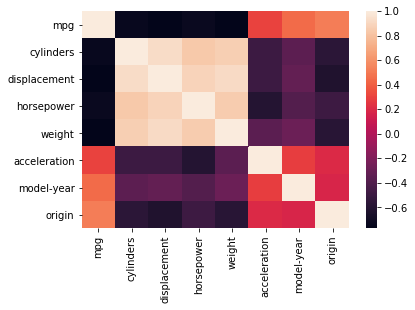

In [89]:
corr = DataFrame.corr()
sns.heatmap(corr)

In [95]:
DataFrame.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model-year,origin,car-name
0,0,8,3,3,2,0,70,1,chevrolet
1,0,8,3,3,3,0,70,1,buick
2,0,8,3,3,2,0,70,1,plymouth
3,0,8,3,3,2,0,70,1,amc
4,0,8,3,3,2,0,70,1,ford
5,0,8,3,3,3,0,70,1,ford
6,0,8,3,3,3,0,70,1,chevrolet
7,0,8,3,3,3,0,70,1,plymouth
8,0,8,3,3,3,0,70,1,pontiac
9,0,8,3,3,3,0,70,1,amc


In [94]:
DataFrame.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model-year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,0.474490,5.471939,1.464286,1.497449,1.500000,1.456633,75.979592,1.576531
std,0.499987,1.705783,1.132523,1.121742,1.119463,1.118620,3.683737,0.805518
min,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,70.000000,1.000000
25%,0.000000,4.000000,0.000000,0.000000,0.750000,0.750000,73.000000,1.000000
50%,0.000000,4.000000,1.000000,1.500000,1.500000,1.000000,76.000000,1.000000
75%,1.000000,8.000000,2.250000,2.250000,2.250000,2.250000,79.000000,2.000000
max,1.000000,8.000000,3.000000,3.000000,3.000000,3.000000,82.000000,3.000000
